In [1]:
import pandas as pd
import time

In [2]:
start_time = time.time()
d1 = pd.read_csv('C:/Users/research_01/pytorch/A_Project_1/by_date/data/이용정보/서울특별시 공공자전거 이용정보(시간대별)_2301-2306.csv')
d2 = pd.read_csv('C:/Users/research_01/pytorch/A_Project_1/by_date/data/이용정보/서울특별시 공공자전거 이용정보(시간대별)_2307-2312.csv')
d3 = pd.read_csv('C:/Users/research_01/pytorch/A_Project_1/by_date/data/이용정보/서울특별시 공공자전거 이용정보(시간대별)_2401-2405.csv')
tmp_data = pd.concat([d1, d2, d3], ignore_index=True)
print(round((time.time() - start_time)/60, 2))

C:\Users\research_01\AppData\Local\Temp\61\ipykernel_3604\1267394010.py:3: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  d2 = pd.read_csv('C:/Users/research_01/pytorch/A_Project_1/by_date/data/이용정보/서울특별시 공공자전거 이용정보(시간대별)_2307-2312.csv')


3.15


In [3]:
data = tmp_data.copy()
data.rename(columns = {'이용시간(분)' : '이용시간'}, inplace = True)
data.rename(columns = {'이동거리(M)' : '이동거리'}, inplace = True)
data = data[data.이용시간 != 0]
data = data[data.이동거리 != 0]
data = data.dropna(axis=0)
print(len(tmp_data), len(data))

55032314 37904172


In [4]:
tmp = data['대여일자'].unique()
date_list = []
weekday_to_date = {}
for i in range(len(tmp)):
    date_list.append(int(tmp[i].replace('-','')))
    if i%7 not in weekday_to_date:
        weekday_to_date[i%7] = []
    weekday_to_date[i%7].append(tmp[i])
print(len(date_list))

517


In [5]:
date_to_weekday = dict()
for weekday, dates in weekday_to_date.items():
    for date in dates:
        date_to_weekday[date] = weekday
data['요일'] = data['대여일자'].map(date_to_weekday)

In [6]:
ph_day_list = ['2023-01-01','2023-01-21','2023-01-22','2023-01-23','2023-01-24','2023-03-01','2023-05-05',
                '2023-05-27','2023-05-29','2023-06-06','2023-08-15','2023-09-28','2023-09-29','2023-09-30',
                '2023-10-02','2023-10-03','2023-10-09','2023-12-25','2024-01-01','2024-02-09','2024-02-10',
                '2024-02-11','2024-02-12','2024-03-01','2024-04-10','2024-05-05','2024-05-06','2024-05-15']

date_to_phday = dict()
for weekday, dates in weekday_to_date.items():
    if weekday == 0 or weekday == 6:
        for date in dates:
            date_to_phday[date] = 0
    else:
        for date in dates:
            if date in ph_day_list:
                date_to_phday[date] = 0
            else:
                date_to_phday[date] = 1
                
phday_to_date = dict()
for date, phday in date_to_phday.items():
    if phday not in phday_to_date:
        phday_to_date[phday] = []
    phday_to_date[phday].append(date)
    
data['공휴일'] = data['대여일자'].map(date_to_phday)

In [7]:
temp = data.groupby('공휴일')['대여구분코드'].apply(list).to_dict()

In [8]:
ticket_dict = dict()
for key in temp.keys():
    if key not in ticket_dict:
        ticket_dict[key] = dict()
    for val in temp[key]:
        if val not in ticket_dict[key]:
            ticket_dict[key][val] = 0
        ticket_dict[key][val] += 1

In [9]:
avg_ticket_dict = dict()
for key in temp.keys():
    if key not in avg_ticket_dict:
        avg_ticket_dict[key] = dict()
    for val in temp[key]:
        if val not in avg_ticket_dict[key]:
            avg_ticket_dict[key][val] = 0
        avg_ticket_dict[key][val] += 1

for key in avg_ticket_dict.keys():
    for k in avg_ticket_dict[key].keys():
        avg_ticket_dict[key][k] /= len(phday_to_date[key])

In [10]:
ticket_dict

{0: {'정기권': 7611125, '일일권': 2601294, '단체권': 5031, '일일권(비회원)': 2253},
 1: {'정기권': 23909949, '일일권': 3767420, '단체권': 4577, '일일권(비회원)': 2523}}

In [11]:
avg_ticket_dict

{0: {'정기권': 45575.59880239521,
  '일일권': 15576.610778443113,
  '단체권': 30.12574850299401,
  '일일권(비회원)': 13.491017964071856},
 1: {'정기권': 68314.14,
  '일일권': 10764.057142857142,
  '단체권': 13.077142857142857,
  '일일권(비회원)': 7.208571428571428}}

In [12]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [13]:
labels = avg_ticket_dict[0].keys()

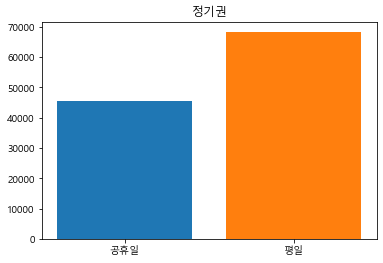

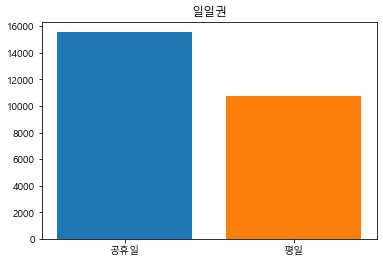

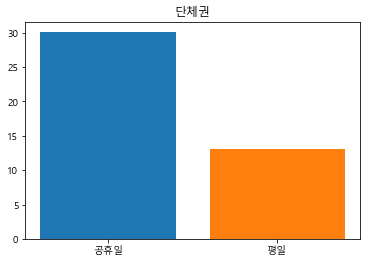

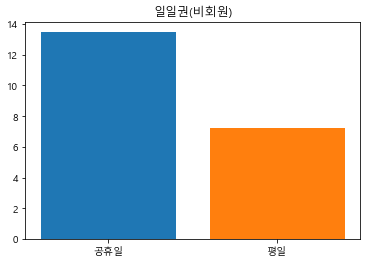

In [14]:
for ticket_label in labels:
    plt.bar('공휴일',avg_ticket_dict[0][ticket_label])
    plt.bar('평일',avg_ticket_dict[1][ticket_label])
    plt.title(ticket_label)
    plt.show()

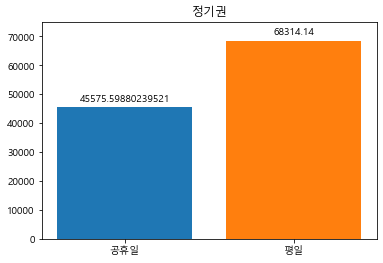

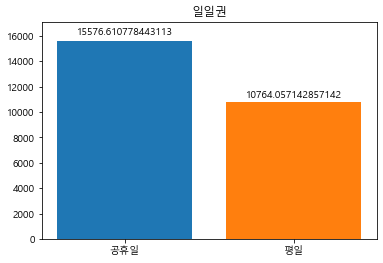

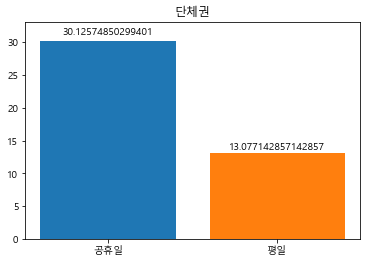

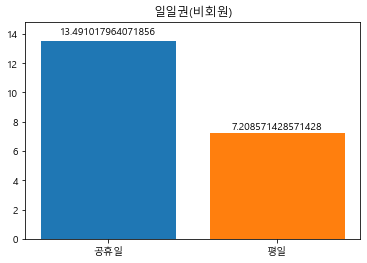

In [20]:
for ticket_label in labels:
    plt.bar('공휴일',avg_ticket_dict[0][ticket_label])
    plt.text('공휴일', avg_ticket_dict[0][ticket_label] + 0.025*avg_ticket_dict[0][ticket_label], str(avg_ticket_dict[0][ticket_label]), ha='center', va='bottom')
    plt.bar('평일',avg_ticket_dict[1][ticket_label])
    plt.text('평일', avg_ticket_dict[1][ticket_label] + 0.025*avg_ticket_dict[1][ticket_label], str(avg_ticket_dict[1][ticket_label]), ha='center', va='bottom')
    plt.title(ticket_label)
    m = max(avg_ticket_dict[0][ticket_label], avg_ticket_dict[1][ticket_label])
    plt.ylim(0,  m + 0.1*m)
    plt.show()